# Lab Revisiting Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In this lab, you will use learningSet.csv file which you already have cloned in today's activities. The full process for the week is shown in the PDF file.

In [2]:
df = pd.read_csv('C:/Users/benja/IH-Labs/lab-revisiting-machine-learning/learningSet.csv')

C:\Users\benja\AppData\Local\Temp\ipykernel_1244\3983890425.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/benja/IH-Labs/lab-revisiting-machine-learning/learningSet.csv')


Instructions
Complete the following steps on the categorical columns in the dataset:

Check for null values in all the columns

In [3]:
df['MAILCODE'] = df['MAILCODE'].apply(lambda x: x.replace(" ", "A"))
df = df.apply(lambda x: x.replace(" ", np.NaN))

In [4]:
df_null_count=pd.DataFrame(df.isnull().sum()*100/len(df)).reset_index()
df_null_count.columns = ['column_name', 'nulls_percentage']
df_null_count=df_null_count[df_null_count['nulls_percentage']>0]
print(len(df_null_count))
df_null_count.head(60)

155


column_name  nulls_percentage
1      OSOURCE          0.972624
6     PVASTATE         98.471890
8       NOEXCH          0.007337
9     RECINHSE         92.974678
10       RECP3         97.886010
11     RECPGVG         99.880518
12    RECSWEEP         98.305245
14      DOMAIN          2.427368
15     CLUSTER          2.427368
16         AGE         24.802960
17     AGEFLAG         30.968851
18    HOMEOWNR         23.296860
19     CHILD03         98.798893
20     CHILD07         98.358697
21     CHILD12         98.101916
22     CHILD18         97.016099
23     NUMCHLD         87.018404
24      INCOME         22.309563
25      GENDER          3.099191
26     WEALTH1         46.882992
28     MBCRAFT         55.395548
29    MBGARDEN         55.395548
30     MBBOOKS         55.395548
31    MBCOLECT         55.458433
32     MAGFAML         55.395548
33      MAGFEM         55.395548
34     MAGMALE         55.395548
35    PUBGARDN         55.395548
36    PUBCULIN         55.395548
37     PUBHLTH         55.395548
38    PUBDOITY         55.395548
39    PUBNEWFN         55.395548
40    PUBPHOTO         55.395548
41      PUBOPP         55.395548
42    DATASRCE         22.303274
50       SOLP3         99.811344
51       SOLIH         93.501866
52       MAJOR         99.691863
53     WEALTH2         45.930281
54     GEOCODE         84.022974
55    COLLECT1         94.547856
56    VETERANS         89.072653
57       BIBLE         90.702427
58       CATLG         91.756802
59       HOMEE         99.070348
60        PETS         84.985117
61      CDPLAY         87.156752
62      STEREO         86.590785
63    PCOWNERS         89.015009
64       PHOTO         94.983859
65      CRAFTS         91.430847
66      FISHER         92.527145
67    GARDENIN         85.953549
68       BOATS         97.874481
69      WALKER         88.994047
70    KIDSTUFF         98.390140
71       CARDS         98.908942
72      PLATES         99.413072
73     LIFESRC         56.630193
74    PEPSTRFL         52.554186

Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

OSOURCE - symbol definitions not provided, too many categories
ZIP - we are including state already

In [5]:
drop_list = ['OSOURCE','ZIP']

Identify columns that have over 50% missing values.

In [6]:
columns_above_threshold = df_null_count[df_null_count['nulls_percentage']>50]
list_to_append = list(columns_above_threshold['column_name'])
drop_list.extend(list_to_append)
drop_list

['OSOURCE',
 'ZIP',
 'PVASTATE',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'NUMCHLD',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'ADATE_15',
 'ADATE_20',
 'ADATE_23',
 'RFA_15',
 'RFA_20',
 'RFA_23',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_

Remove those columns from the dataframe

In [7]:
df_2 = df.drop(columns=drop_list, axis=1)
print(df_2.shape)
print(df.shape)

(95412, 381)
(95412, 481)


Perform all of the cleaning processes from the Lesson.

In [8]:
Y = df_2[['TARGET_B', 'TARGET_D']]
numerical = df_2.select_dtypes(np.number)
categorical = df_2.select_dtypes(object)
categorical.shape

(95412, 36)

In [9]:
categorical['STATE'].value_counts().describe().T

count       57.000000
mean      1673.894737
std       2851.541286
min          1.000000
25%         26.000000
50%        569.000000
75%       2175.000000
max      17343.000000
Name: count, dtype: float64

In [10]:
states_groups = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

states_groups.columns = ['state', 'count']
other_states = list(states_groups[states_groups['count']<2175]['state'])
#other_states
def clean_state(x):
    if x in other_states:
        return 'OTHER'
    else:
        return x
    
categorical['STATE'] = list(map(clean_state, categorical['STATE']))
categorical['STATE'].unique()

array(['IL', 'CA', 'NC', 'FL', 'OTHER', 'IN', 'TN', 'MN', 'MI', 'MO',
       'TX', 'OR', 'WA', 'WI', 'GA', 'AZ'], dtype=object)

In [11]:
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')
categorical['DOMAIN_A'] = list(map(lambda x: x[0], categorical['DOMAIN']))
categorical['DOMAIN_B'] = list(map(lambda x: x[1], categorical['DOMAIN']))
categorical[['DOMAIN','DOMAIN_A','DOMAIN_B']].head()
categorical = categorical.drop(columns=['DOMAIN_A','DOMAIN_B'])
categorical

STATE MAILCODE NOEXCH MDMAUD DOMAIN CLUSTER AGEFLAG HOMEOWNR GENDER  \
0         IL        A      0   XXXX     T2      36     NaN      NaN      F   
1         CA        A      0   XXXX     S1      14       E        H      M   
2         NC        A      0   XXXX     R2      43     NaN        U      M   
3         CA        A      0   XXXX     R2      44       E        U      F   
4         FL        A      0   XXXX     S2      16       E        H      F   
...      ...      ...    ...    ...    ...     ...     ...      ...    ...   
95407  OTHER        A      0   XXXX     C2      27     NaN      NaN      M   
95408     TX        A      0   XXXX     C1      24       E        H      M   
95409     MI        A      0   XXXX     C3      30     NaN      NaN      M   
95410     CA        A      0   XXXX     C1      24       E        H      F   
95411     NC        A      0   C1CM     C1      24       E        U      F   

      DATASRCE RFA_2 RFA_3 RFA_4 RFA_5 RFA_6 RFA_7 RFA_8 RFA_9 RFA_10 RFA_11  \
0          NaN   L4E   S4E   S4E   S4E   S4E   S4E   S4E   S4E    S4E    S4E   
1            3   L2G   A2G   A2G   A2G   A2G   A1E   A1E   A1E    A1E    A1E   
2            3   L4E   S4E   S4E   S4E   S4E   S4F   S4F   S4F    NaN    S4F   
3            3   L4E   S4E   S4E   S4E   S4E   S4E   S4E   S4E    NaN    S4E   
4            3   L2F   A2F   A2F   A2F   A1D   I2D   A1E   A1E    L1D    A1E   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
95407      NaN   L1G   F1G   F1G   NaN   F1G   P1G   P1G   NaN    NaN    NaN   
95408        3   L1F   NaN   NaN   NaN   NaN   P1F   P1F   NaN    NaN    NaN   
95409      NaN   L3E   S4E   S4E   S3E   S3E   NaN   A2E   N3E    N3E    N3E   
95410        2   L4F   S4F   A3F   S4F   S4F   S4F   S4F   S4F    S4F    S4F   
95411        3   L1G   A1G   A1G   A1G   A1G   L3G   L3G   L4G    A1G    A1G   

      RFA_12 RFA_13 RFA_14 RFA_16 RFA_17 RFA_18 RFA_19 RFA_21 RFA_22 RFA_24  \
0        S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E   
1        A1E    NaN    NaN    L1E    NaN    NaN    N1E    N1E    N1E    F1E   
2        S4F    S4F    S4F    S4F    NaN    S4D    S4D    NaN    S4D    S3D   
3        S4E    S4E    S4E    S4E    S2D    S2D    A1D    A1D    A1D    NaN   
4        A1E    L1D    L3D    L3D    A2D    A2D    A3D    A3D    I4E    A3D   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
95407    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
95408    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
95409    N3E    N3E    N3E    F1D    NaN    F1D    NaN    P1D    P1D    NaN   
95410    S4F    S4F    S4F    S3F    S2F    S2F    A1F    A1F    A1F    S3F   
95411    A1G    A1G    A1G    S2G    S3G    S3G    S4G    S3G    S3G    S3G   

      RFA_2R RFA_2A MDMAUD_R MDMAUD_F MDMAUD_A GEOCODE2  
0          L      E        X        X        X        C  
1          L      G        X        X        X        A  
2          L      E        X        X        X        C  
3          L      E        X        X        X        C  
4          L      F        X        X        X        A  
...      ...    ...      ...      ...      ...      ...  
95407      L      G        X        X        X        C  
95408      L      F        X        X        X        A  
95409      L      E        X        X        X        B  
95410      L      F        X        X        X        A  
95411      L      G        C        1        C        C  

[95412 rows x 36 columns]

Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

Note that there are a few null values in the column. We will first replace those null values using the code below:

In [12]:
categorical['GENDER'] = categorical['GENDER'].fillna('F')
categorical['GENDER'] = categorical['GENDER'].replace(['U', 'J', 'C', 'A'], 'OTHER')
categorical['GENDER'].value_counts()

GENDER
F        54234
M        39094
OTHER     2084
Name: count, dtype: int64

# Lab Feature Engineering

In [13]:
#to analyze each column and the proportions of the unique values I use:
categorical['GEOCODE2'].value_counts(dropna=False).reset_index().sort_values('GEOCODE2',ascending=True)

GEOCODE2  count
0        A  34484
1        B  28505
3        C  15524
2        D  16580
4      NaN    319

In [14]:
categorical['DOMAIN'].value_counts(dropna=False).reset_index().sort_values('DOMAIN',ascending=True)

DOMAIN  count
5      C1   6145
4      C2   8264
6      C3   5280
15     R1   1358
0      R2  15939
8      R3   4809
2      S1  11503
3      S2   8530
13     S3   1891
7      T1   4982
1      T2  12369
12     T3   2176
9      U1   4510
10     U2   3254
11     U3   2598
14     U4   1804

In [15]:
categorical.isnull().sum()

# MAILCODE, NOEXCH, AGEFLAG, RFA_(+3) drop due to lack of relevancy
# CLUSTER (redundant with DOMAIN), RFA_2R (RFA), RFA_2A (idem), MDMAUD_X(MDMAUD) drop due to redundancy

# HOMEOWNR to be fixed by adding nan to Unkown
# DATASRCE to be fixed by adding unkown for nans
# GEOCODE2 to be fixed by adding NM for No Match


STATE           0
MAILCODE        0
NOEXCH          7
MDMAUD          0
DOMAIN          0
CLUSTER      2316
AGEFLAG     29548
HOMEOWNR    22228
GENDER          0
DATASRCE    21280
RFA_2           0
RFA_3        1950
RFA_4        2312
RFA_5       33590
RFA_6        3557
RFA_7        8874
RFA_8        3511
RFA_9       11245
RFA_10      32748
RFA_11      10422
RFA_12       8923
RFA_13      40219
RFA_14      18867
RFA_16      20417
RFA_17      27650
RFA_18      21263
RFA_19      24492
RFA_21      35212
RFA_22      25648
RFA_24      36973
RFA_2R          0
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      319
dtype: int64

In [16]:
categorical=categorical.drop(columns=['MAILCODE','NOEXCH','AGEFLAG','RFA_2R','RFA_2A','RFA_3','RFA_4','RFA_5','RFA_6','RFA_7','RFA_8','RFA_9','RFA_10','RFA_11','MDMAUD_R','MDMAUD_F','MDMAUD_A','RFA_12','RFA_13','RFA_14','RFA_16','RFA_17','RFA_18','RFA_19','RFA_21','RFA_22','RFA_24','CLUSTER'])

In [17]:
categorical['DATASRCE'] = categorical['DATASRCE'].fillna('0')
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna('U')
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('NM')

In [18]:
categorical.isnull().sum().sum()

0

## Numericals

In [19]:
numerical.drop(columns = ['TARGET_B', 'TARGET_D'])

ODATEDW  TCODE   DOB   AGE  INCOME  WEALTH1  HIT  MALEMILI  MALEVET  \
0         8901      0  3712  60.0     NaN      NaN    0         0       39   
1         9401      1  5202  46.0     6.0      9.0   16         0       15   
2         9001      1     0   NaN     3.0      1.0    2         0       20   
3         8701      0  2801  70.0     1.0      4.0    2         0       23   
4         8601      0  2001  78.0     3.0      2.0   60         1       28   
...        ...    ...   ...   ...     ...      ...  ...       ...      ...   
95407     9601      1     0   NaN     NaN      NaN    0        14       36   
95408     9601      1  5001  48.0     7.0      9.0    1         0       31   
95409     9501      1  3801  60.0     NaN      NaN    0         0       18   
95410     8601      0  4005  58.0     7.0      NaN    0         0       28   
95411     8801      2  1801  80.0     5.0      8.0    3         1       33   

       VIETVETS  WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  \
0            34        18        10         2       1      5.0     992   
1            55        11         6         2       1      9.0    3611   
2            29        33         6         8       1      1.0    7001   
3            14        31         3         0       3      0.0     640   
4             9        53        26         3       2      NaN    2520   
...         ...       ...       ...       ...     ...      ...     ...   
95407        47        11         7         8      13      NaN   27380   
95408        43        19         4         1       0      NaN    1254   
95409        46        20         7        23       0      NaN     552   
95410        35        20         9         1       1      7.0    1746   
95411        22        27         8        10       3      8.0    3935   

       POP902  POP903  POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  \
0         264     332        0       35       65       47       53    92   
1         940     998       99        0        0       50       50    67   
2        2040    2669        0        2       98       49       51    96   
3         160     219        0        8       92       54       46    61   
4         627     761       99        0        0       46       54     2   
...       ...     ...      ...      ...      ...      ...      ...   ...   
95407    7252   10037       99        0        0       50       50    78   
95408     322     361       96        0        4       51       49    91   
95409     131     205       99        0        0       53       47    82   
95410     432     508       99        0        0       47       53    92   
95411    1192    1342       99        0        0       48       52    86   

       ETH2  ETH3  ETH4  ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  \
0         1     0     0    11     0     0     0     0      0      0      0   
1         0     0    31     6     4     2     6     4     14      0      0   
2         2     0     0     2     0     0     0     0      0      0      0   
3         0     0    11    32     6     2     0     0      0      0      0   
4        98     0     0     1     0     0     0     0      0      0      0   
...     ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
95407    10     6     4     5     0     0     0     1      1      0      0   
95408     3     0     2     6     1     0     1     0      0      0      0   
95409    14     0     1     9     0     0     0     0      0      0      0   
95410     1     1     5     8     0     1     2     0      1      0      0   
95411    12     0     1     1     0     0     0     0      0      0      0   

       ETH13  ETH14  ETH15  ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  \
0         11      0      0      0      39      48      51      40      50   
1          2      0      1      4      34      41      43      32      42   
2          2      0      0      0      35      43      46      37      45   
3         31      0    

In [20]:
null_num = numerical.isnull().sum().reset_index()
null_num.columns =['column_name','null_count']
null_num[null_num['null_count']>0]

column_name  null_count
3           AGE       23665
4        INCOME       21286
5       WEALTH1       44732
14      WEALTH2       43823
135         MSA         132
136         ADI         132
137         DMA         132
302     ADATE_3        1950
303     ADATE_4        2191
304     ADATE_5       33590
305     ADATE_6        3557
306     ADATE_7        8874
307     ADATE_8        3511
308     ADATE_9       11245
309    ADATE_10       32748
310    ADATE_11       10422
311    ADATE_12        8923
312    ADATE_13       40219
313    ADATE_14       18867
314    ADATE_16       20364
315    ADATE_17       27650
316    ADATE_18       21263
317    ADATE_19       24480
318    ADATE_21       35212
319    ADATE_22       25648
320    ADATE_24       36973
336    NEXTDATE        9973
337     TIMELAG        9973
344    CLUSTER2         132

In [21]:
import numpy as np
# numerical['AG_29.2, 78.6,99]
names = ['1', '2', '3', '4', '5']
age_group = numerical['AGE']
age_group = pd.cut(age_group,bins=5,labels=names, include_lowest=True)

In [22]:
# age_group.isnull().sum()
default = 6
age_group= age_group.cat.add_categories([default])
age_group = age_group.fillna(default)
age_group.value_counts()

AGE
4    26305
3    25142
6    23665
5    12899
2     7327
1       74
Name: count, dtype: int64

In [23]:
numerical['AGE'] = age_group

In [24]:
# I tried to create a model for INCOME but the highest score I got was 0.21 after several tries.
# I will just fill with category zero 

numerical['INCOME']= numerical['INCOME'].fillna(0)
numerical['INCOME'].value_counts(dropna=False).reset_index().sort_values('INCOME',ascending=True)

INCOME  count
0     0.0  21286
4     1.0   9022
2     2.0  13114
5     3.0   8558
3     4.0  12732
1     5.0  15451
6     6.0   7778
7     7.0   7471

In [25]:
numerical['WEALTH1'].value_counts(dropna=False).reset_index().sort_values('WEALTH1',ascending=True)
numerical['WEALTH1']=numerical['WEALTH1'].fillna('10')

C:\Users\benja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


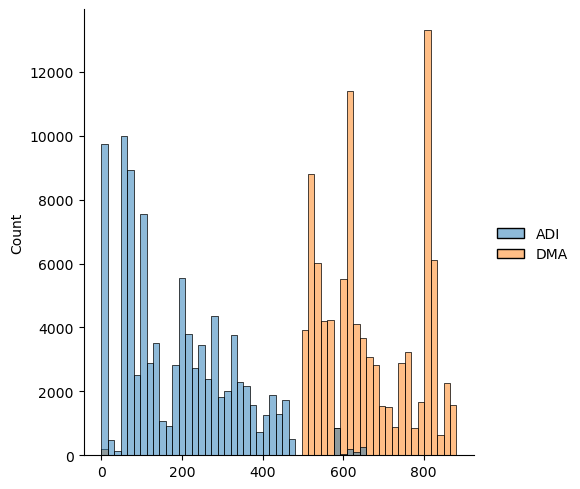

In [26]:
#MSA, ADI, DMA are local market designations based on marketing communication
#ADI and DMA give similar segmentations (but ranked differently), MSA takes only county clusters above 50,000 inhabitants.
#my decision is to take only one to the next final.

numerical[['MSA','ADI','DMA']].sort_values('DMA',ascending=False)
sns.displot(numerical[['ADI','DMA']])
# after seeing the plot I think that DMA has less zero values and the informations is concentrated in a smaller range.
numerical=numerical.drop(columns=['MSA','ADI'])

In [27]:
numerical['DMA']=numerical['DMA'].fillna('0')

count    85439.000000
mean         8.093739
std          8.213242
min          0.000000
25%          4.000000
50%          6.000000
75%         11.000000
max       1088.000000
Name: TIMELAG, dtype: float64

<Axes: xlabel='TIMELAG', ylabel='Count'>

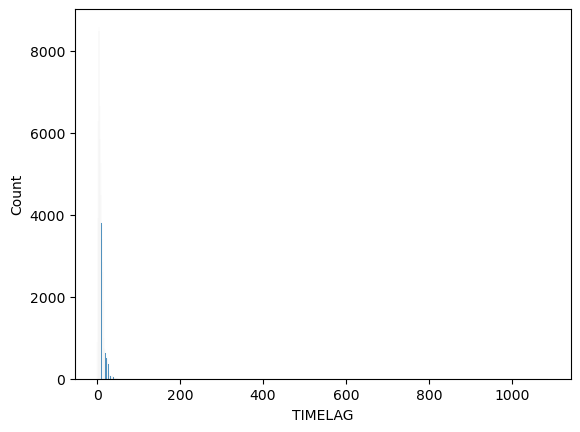

In [28]:
# let's check if timelag and nextdate are skewed if they are I fill nulls with the median if they are normally distributed then i fill with the mean
display(numerical['TIMELAG'].describe().T)
sns.histplot(numerical['TIMELAG'])
#There is clearly outliers so I proceed with the median

In [29]:
numerical['TIMELAG']=numerical['TIMELAG'].fillna(numerical['TIMELAG'].median())

count    85439.000000
mean      9151.022917
std        294.257260
min       7211.000000
25%       8903.000000
50%       9204.000000
75%       9409.000000
max       9702.000000
Name: NEXTDATE, dtype: float64

<Axes: xlabel='NEXTDATE', ylabel='Count'>

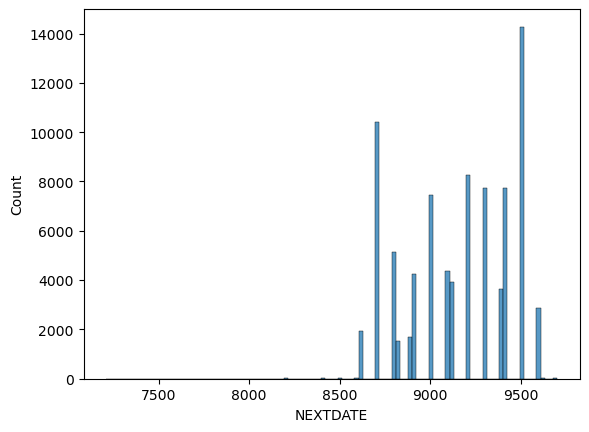

In [30]:
display(numerical['NEXTDATE'].describe().T)
sns.histplot(numerical['NEXTDATE'])
#Closer to normal distribution nevertheless some important number outliers below 8500 I will use the median

In [31]:
numerical['NEXTDATE']=numerical['NEXTDATE'].fillna(numerical['NEXTDATE'].median())

In [32]:
#Wealth 2 has too many NaN values and I belive it can be redundant in front of ICX Census data. So i decided to drop
numerical['WEALTH2'].value_counts(dropna=False).reset_index().sort_values('WEALTH2',ascending=True)
numerical=numerical.drop(columns=['WEALTH2'])

In [33]:
#dates of campaing i decided to drop them to find them irrelevant
numerical=numerical.drop(columns=['ADATE_2','ADATE_3','ADATE_4','ADATE_5','ADATE_6','ADATE_7','ADATE_8','ADATE_9','ADATE_10','ADATE_11','ADATE_12','ADATE_13','ADATE_14','ADATE_16','ADATE_17','ADATE_18','ADATE_19','ADATE_21','ADATE_22','ADATE_24'])

<Axes: xlabel='count', ylabel='Count'>

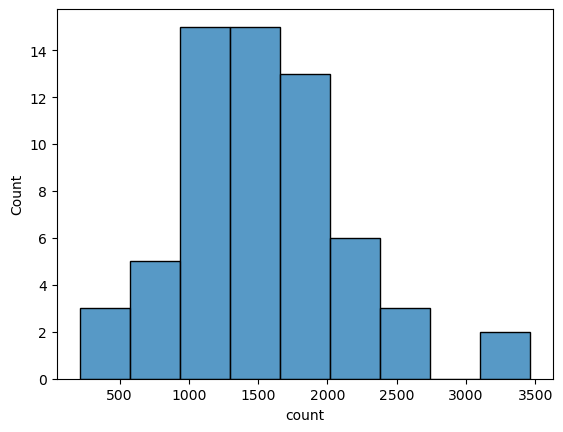

In [34]:
# I decided to take out CLUSTER because it seem a redundant with DOMAIN and had several nulls. 
# CLUSTER2 has less nulls. First I think that CLUSTER belong to categorical so it should be moved
# # categorical['CLUSTER2']=numerical['CLUSTER2']
# Second I check the distribution to see any disproportion
sns.histplot(numerical['CLUSTER2'].value_counts())

In [35]:
mapping = {'C1':5,'C2':6,'C3':7,'R1':14,'R2':15,'R3':16,'S1':8,'S2':9,'S3':10,'T1':11,'T2':12,'T3':13,'U1':1,'U2':2,'U3':3,'U4':4}
encoded = categorical['DOMAIN'].map(mapping)
# U=Urban (1,2,3,4)
# C=City (5,6,7)
# S=Suburban (8,9,10)
# T=Town (11,12,13)
# R=Rural (14,15,16)


mini_income_data = pd.concat([numerical['CLUSTER2'],encoded],axis=1)
X = mini_income_data.dropna()
display(X.corr())
y = X['CLUSTER2'].values.reshape(-1, 1)
X = X['DOMAIN'].values.reshape(-1, 1)

null_rows = mini_income_data[mini_income_data.isnull().any(axis=1)]
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(null_rows[['DOMAIN']])

null_rows['CLUSTER2'] = y_pred
null_rows
df_combined = pd.concat([mini_income_data.dropna(), null_rows])
df_combined

CLUSTER2    DOMAIN
CLUSTER2  1.000000  0.528051
DOMAIN    0.528051  1.000000

C:\Users\benja\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\benja\AppData\Local\Temp\ipykernel_1244\901967530.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_rows['CLUSTER2'] = y_pred


CLUSTER2  DOMAIN
0      39.000000      12
1       1.000000       8
2      60.000000      15
3      41.000000      15
4      26.000000       9
...          ...     ...
90627  23.733545       6
90993  23.733545       6
92870  16.857264       3
93624  21.441452       5
94604  44.362388      15

[95412 rows x 2 columns]

In [36]:
numerical = numerical.drop(['CLUSTER2'],axis=1)


In [37]:
categorical[['CLUSTER2', 'DOMAIN']] = df_combined[['CLUSTER2', 'DOMAIN']]

In [38]:
categorical.isnull().sum().sum()

0

In [39]:
numerical.isnull().sum().sum()

0